<a href="https://colab.research.google.com/github/ii200400/Tensorflow_Tutorial/blob/master/10%20-%20RNN/01_MNIST(2_1ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

MNIST(손글씨 숫자 인식) 문제를 RNN 신경망으로 풀어보기

[텐서플로우 rnn 튜토리얼 참고](https://www.tensorflow.org/guide/keras/rnn)

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


## 데이터 정의

RNN은 순서가 있는 데이터를 넣어주어야 하므로 MNIST의 이미지들을 가로 한 줄씩(28픽셀) 28번 넣어줄 것이다.

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
y_train, y_test = tf.one_hot(y_train, 10), tf.one_hot(y_test, 10)

## 모델 구성

### 옵션 설정

In [ ]:
# 위에서 말한 대로 순서가 있는 데이터로 만들어서 
# 한 번에 28개의 픽셀과 28번의 입력(step)이 있도록 설정한다.
n_input = 28
n_step = 28
n_hidden = 128
n_class = 10

learning_rate = 0.001
epochs = 10
batch_size = 128

### 신경망 구성

In [ ]:
def make_rnn():
  cell = tf.keras.layers.SimpleRNNCell(n_hidden)

  model = tf.keras.Sequential([
    tf.keras.layers.RNN(cell, dtype=tf.float32, input_shape=(n_step, n_input)),
    tf.keras.layers.Dense(n_class, activation='softmax')
  ])

  return model

rnn = make_rnn()
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn (RNN)                    (None, 128)               20096     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


### 비용 및 최적화 설정

In [ ]:
rnn.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
            loss=tf.keras.losses.binary_crossentropy,
            metrics = ['accuracy'])

### 모델 학습

In [ ]:
rnn.fit(x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=epochs)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1476 - accuracy: 0.9464
Epoch 2/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0512 - accuracy: 0.9842
Epoch 3/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0364 - accuracy: 0.9889
Epoch 4/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0303 - accuracy: 0.9908
Epoch 5/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0264 - accuracy: 0.9921
Epoch 6/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0242 - accuracy: 0.9927
Epoch 7/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0215 - accuracy: 0.9934
Epoch 8/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0203 - accuracy: 0.9939
Epoch 9/10
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0190 - accuracy: 0.9

### 모델 테스트

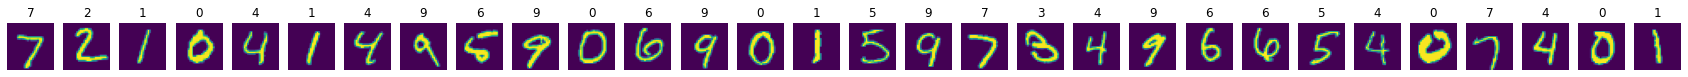

In [ ]:
sample_size = 10
test_image = x_test[:sample_size]
test_label = y_test[:sample_size]

samples = rnn(x_test)

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

for i in range(sample_size):
  ax[i].set_axis_off()
  ax[i].imshow(test_image[i])
  ax[i].set_title(tf.argmax(samples[i]).numpy())

plt.show()

## 전체 코드

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
y_train, y_test = tf.one_hot(y_train, 10), tf.one_hot(y_test, 10)

#########
# 옵션 설정
######

n_input = 28
n_step = 28
n_hidden = 128
n_class = 10

learning_rate = 0.001
epochs = 10
batch_size = 128

#########
# 신경망 모델 구성
######

def make_rnn():
  cell = tf.keras.layers.SimpleRNNCell(n_hidden)

  model = tf.keras.Sequential([
    tf.keras.layers.RNN(cell, dtype=tf.float32, input_shape=(n_step, n_input)),
    tf.keras.layers.Dense(n_class, activation='sigmoid')
  ])

  return model

rnn = make_rnn()
# rnn.summary()

rnn.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
            loss=tf.keras.losses.binary_crossentropy,
            metrics = ['accuracy'])


#########
# 신경망 모델 학습
######

rnn.fit(x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=epochs)

#########
# 결과 확인
######

sample_size = 30
test_image = x_test[:sample_size]
test_label = y_test[:sample_size]

samples = rnn(x_test)

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

for i in range(sample_size):
  ax[i].set_axis_off()
  ax[i].imshow(test_image[i])
  ax[i].set_title(tf.argmax(samples[i]).numpy())

plt.show()